In [1]:
#! /usr/bin/python3
# author : Priyanshu Shrivastav (from IIT Palakkad, India)

import numpy as np, matplotlib.pyplot as plt
import csv, sys
from sklearn.preprocessing import MinMaxScaler

file_name = input("file index : ")
DATA_SIZE = 10000
PARAMETER_COUNT = 2
TRAIN_DATA_SET  = "Train" + file_name + ".csv"
TEST_DATA_SET   = "Test" + file_name + ".csv"
ALPHA           = 0.001

train_sz, test_sz, loss = 0, 0, []
X = np.ndarray((DATA_SIZE, PARAMETER_COUNT + 1)) # +1 for bias
Y = np.zeros(DATA_SIZE, dtype=int)
W = np.ndarray(PARAMETER_COUNT + 1)
min_max_scaler = MinMaxScaler()

class Perceptron:
    # Take training input data
    def take_training_input(self):
        global train_sz
        train_sz = 0
        with open(TRAIN_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[train_sz][p] = float(row[p])
                X[train_sz][PARAMETER_COUNT] = 1.0
                Y[train_sz] = float(row[PARAMETER_COUNT])
                if Y[train_sz] == 0:
                    Y[train_sz] = -1
                train_sz += 1

# plot training data data
    def show_data(self, title, xlab="", ylab=""):
        print('=== Data points given to train : {sz} ==='.format(sz=train_sz))
        plt.title(title)
        plt.xlabel(xlab)
        plt.ylabel(ylab)
        for train_data_index in range(train_sz):
            if (Y[train_data_index] == 1):
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'bo')
            else:
                plt.plot(X[train_data_index][0], X[train_data_index][1], 'ro')

# find weights
    def find_weights(self):
        global train_sz, W, loss
        print("================================       TRAINING       ==================================")
        print("Training data size : {tz}".format(tz=train_sz))
        W = np.random.random(PARAMETER_COUNT + 1)
        ok = False
        epoch = 0
        while ok is False:
            if epoch > 500: # linear classification not possible
                break
            W_old, x_add, y_real = np.copy(W), [], 0
            epoch += 1
            ok = True
            err_cnt = 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and Y[tc] < 0):
                    x_add = np.copy(-1*X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                elif (y_hat < 0 and Y[tc] > 0):
                    x_add = np.copy(X[tc].T)
                    W = np.add(W, ALPHA * x_add)
                    err_cnt += 1
                    ok = False
                loss.append(err_cnt)

            err_pos, err_neg, tp, tn = 0, 0, 0, 0
            for tc in range(train_sz):
                y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
                if (y_hat > 0 and y_real < 0):
                    err_neg += 1
                elif (y_hat < 0 and y_real > 0):
                    err_pos += 1
                elif (y_real > 0):
                    tp += 1
                elif (y_real < 0):
                    tn += 1

            print("----------------------------------------------------------------------------------------")
            print("[ Epoch : {epoch} ], [ error count : {err} ]".format(epoch=epoch, err=err_cnt))
            print("W_old : {w_old}".format(w_old=W_old))
            print("W_new : {w_new}".format(w_new=W))
            print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
            print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))

    def draw_line_2d(self):
        global train_sz, W
        mx_x1, mx_x2 = -1e9, -1e9
        mn_x1, mn_x2 = 1e9, 1e9
        for tc in range(train_sz):
            mx_x1 = max(mx_x1, X[tc][0])
            mn_x1 = min(mn_x1, X[tc][0])
        X1 = np.linspace(mn_x1, mx_x1, 1000)
        # 0 = w[0]*x[0] + w[1]*x[1] + w[2]*x[3]
        X2 = []
        for x in X1:
            X2.append(-1*(W[0]*x + W[2]*1.0)/W[1])
        plt.plot(X1, X2)


    def take_test_input(self):
        global test_sz, X, Y
        test_sz = 0
        with open(TEST_DATA_SET) as csv_file:
            csv_reader = csv.reader(csv_file, delimiter=',')
            for row in csv_reader:
                for p in range(PARAMETER_COUNT):
                    X[test_sz][p] = float(row[p])
                X[test_sz][PARAMETER_COUNT] = 1.0
                Y[test_sz] = float(row[PARAMETER_COUNT])
                if Y[test_sz] == 0:
                    Y[test_sz] = -1
                test_sz += 1

    def test(self):
        global test_sz, X, Y, loss, W
        print("================================       TESTING        ==================================")
        print("Test Data size : ", test_sz)
        loss, err_pos, err_neg, tp, tn = [], 0, 0, 0, 0
        for tc in range(test_sz):
            y_hat, y_real = float(np.dot(W, X[tc].T)), Y[tc]
            if (y_hat > 0 and y_real < 0):
                err_neg += 1
            elif (y_hat < 0 and y_real > 0):
                err_pos += 1
            elif (y_real > 0):
                tp += 1
            elif (y_real < 0):
                tn += 1
        print("True positive : {tp}, False positive : {fp}".format(tp=tp, fp=err_neg))
        print("True negative : {tn}, False negative : {fn}".format(tn=tn, fn=err_pos))
        print("============================         TESTING FINISHED          =========================")

    def draw_error_count(self):
        global loss, train_sz
        ep = [epoch + 1 for epoch in range(len(loss))]
        accuracy = [train_sz - x for x in loss]
        plt.title("Classification Error v/s iterations")
        plt.ylabel("Classification Error")
        plt.xlabel("Iterations")
        plt.plot(ep, loss, 'r')
        plt.show()

        plt.title("Classification Accuracy v/s iterations")
        plt.ylabel("Classification Accuracy")
        plt.xlabel("Iterations")
        plt.plot(ep, accuracy, 'b')
        plt.show()


file index : 6


In [2]:

t = Perceptron()
t.take_training_input()

In [3]:
t.find_weights()

================================       TRAINING       ==================================
Training data size : 960
----------------------------------------------------------------------------------------
[ Epoch : 1 ], [ error count : 371 ]
W_old : [0.06924997 0.41815958 0.43173141]
W_new : [0.04931795 0.29675717 0.10073141]
True positive : 353, False positive : 288
True negative : 192, False negative : 127
----------------------------------------------------------------------------------------
[ Epoch : 2 ], [ error count : 444 ]
W_old : [0.04931795 0.29675717 0.10073141]
W_new : [0.01460878 0.0793326  0.00073141]
True positive : 247, False positive : 241
True negative : 239, False negative : 233
----------------------------------------------------------------------------------------
[ Epoch : 3 ], [ error count : 466 ]
W_old : [0.01460878 0.0793326  0.00073141]
W_new : [0.0003092  0.00083572 0.00073141]
True positive : 480, False positive : 390
True negative : 90, False negative : 0
-

----------------------------------------------------------------------------------------
[ Epoch : 29 ], [ error count : 464 ]
W_old : [ 4.79089861e-04 -3.63800652e-05  7.31412380e-04]
W_new : [ 0.0007896  -0.00015439  0.00073141]
True positive : 480, False positive : 419
True negative : 61, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 30 ], [ error count : 452 ]
W_old : [ 0.0007896  -0.00015439  0.00073141]
W_new : [-7.07091767e-05 -1.17312413e-04  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 31 ], [ error count : 456 ]
W_old : [-7.07091767e-05 -1.17312413e-04  7.31412380e-04]
W_new : [ 5.85907863e-04 -3.65905190e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 57 ], [ error count : 454 ]
W_old : [0.00024471 0.00072204 0.00073141]
W_new : [0.00024251 0.00101449 0.00073141]
True positive : 480, False positive : 361
True negative : 119, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 58 ], [ error count : 456 ]
W_old : [0.00024251 0.00101449 0.00073141]
W_new : [0.00016513 0.00023397 0.00073141]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 59 ], [ error count : 472 ]
W_old : [0.00016513 0.00023397 0.00073141]
W_new : [0.00019018 0.00101994 0.00073141]
True positive : 480, False positive : 367
True negative : 113, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 60 ], [ error coun

----------------------------------------------------------------------------------------
[ Epoch : 96 ], [ error count : 466 ]
W_old : [0.00032592 0.00079042 0.00073141]
W_new : [-2.61979640e-06 -1.26355088e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 97 ], [ error count : 456 ]
W_old : [-2.61979640e-06 -1.26355088e-05  7.31412380e-04]
W_new : [ 2.28065756e-04 -1.05678610e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 98 ], [ error count : 468 ]
W_old : [ 2.28065756e-04 -1.05678610e-05  7.31412380e-04]
W_new : [3.47736688e-05 4.24494031e-04 7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
-------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 136 ], [ error count : 458 ]
W_old : [ 5.90682893e-04 -4.38293824e-05  7.31412380e-04]
W_new : [0.00028171 0.00086569 0.00073141]
True positive : 480, False positive : 385
True negative : 95, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 137 ], [ error count : 464 ]
W_old : [0.00028171 0.00086569 0.00073141]
W_new : [0.0001561  0.00022706 0.00073141]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 138 ], [ error count : 450 ]
W_old : [0.0001561  0.00022706 0.00073141]
W_new : [3.93621244e-04 7.69897346e-05 7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[

----------------------------------------------------------------------------------------
[ Epoch : 170 ], [ error count : 462 ]
W_old : [-6.31680463e-05  2.30604806e-04  7.31412380e-04]
W_new : [ 5.93640514e-04 -2.14426292e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 171 ], [ error count : 460 ]
W_old : [ 5.93640514e-04 -2.14426292e-05  7.31412380e-04]
W_new : [ 1.73078642e-05 -2.22450246e-04  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 172 ], [ error count : 458 ]
W_old : [ 1.73078642e-05 -2.22450246e-04  7.31412380e-04]
W_new : [ 5.64221115e-04 -1.28571260e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------

----------------------------------------------------------------------------------------
[ Epoch : 198 ], [ error count : 458 ]
W_old : [0.00034747 0.00084106 0.00073141]
W_new : [ 7.57022739e-04 -9.33297590e-05  7.31412380e-04]
True positive : 480, False positive : 442
True negative : 38, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 199 ], [ error count : 464 ]
W_old : [ 7.57022739e-04 -9.33297590e-05  7.31412380e-04]
W_new : [ 5.64540931e-04 -6.60729965e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 200 ], [ error count : 464 ]
W_old : [ 5.64540931e-04 -6.60729965e-05  7.31412380e-04]
W_new : [0.00021522 0.00098603 0.00073141]
True positive : 480, False positive : 370
True negative : 110, False negative : 0
-------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 229 ], [ error count : 456 ]
W_old : [ 1.96870632e-05 -2.36229978e-04  7.31412380e-04]
W_new : [ 0.00063426 -0.00013578  0.00073141]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 230 ], [ error count : 476 ]
W_old : [ 0.00063426 -0.00013578  0.00073141]
W_new : [0.00025491 0.00014912 0.00073141]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 231 ], [ error count : 444 ]
W_old : [0.00025491 0.00014912 0.00073141]
W_new : [ 3.83607900e-04 -4.96957875e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 266 ], [ error count : 464 ]
W_old : [ 0.00064682 -0.00020459  0.00073141]
W_new : [-0.00017383  0.0003068   0.00073141]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 267 ], [ error count : 462 ]
W_old : [-0.00017383  0.0003068   0.00073141]
W_new : [-3.54778056e-05 -3.32737608e-04  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 268 ], [ error count : 444 ]
W_old : [-3.54778056e-05 -3.32737608e-04  7.31412380e-04]
W_new : [0.00021869 0.00081659 0.00073141]
True positive : 480, False positive : 395
True negative : 85, False negative : 0
------------------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 295 ], [ error count : 458 ]
W_old : [-5.36733429e-05 -1.81074133e-04  7.31412380e-04]
W_new : [ 7.59299331e-04 -9.15242506e-05  7.31412380e-04]
True positive : 480, False positive : 442
True negative : 38, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 296 ], [ error count : 464 ]
W_old : [ 7.59299331e-04 -9.15242506e-05  7.31412380e-04]
W_new : [ 5.66817523e-04 -6.42674881e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 297 ], [ error count : 460 ]
W_old : [ 5.66817523e-04 -6.42674881e-05  7.31412380e-04]
W_new : [0.0004961  0.00013242 0.00073141]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 333 ], [ error count : 450 ]
W_old : [0.00027188 0.00087449 0.00073141]
W_new : [ 4.76484687e-04 -3.56138131e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 334 ], [ error count : 464 ]
W_old : [ 4.76484687e-04 -3.56138131e-05  7.31412380e-04]
W_new : [ 0.000787   -0.00015362  0.00073141]
True positive : 480, False positive : 421
True negative : 59, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 335 ], [ error count : 452 ]
W_old : [ 0.000787   -0.00015362  0.00073141]
W_new : [-7.33143501e-05 -1.16546161e-04  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 363 ], [ error count : 456 ]
W_old : [0.00016223 0.00105586 0.00073141]
W_new : [ 5.67567949e-04 -2.57745647e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 364 ], [ error count : 470 ]
W_old : [ 5.67567949e-04 -2.57745647e-05  7.31412380e-04]
W_new : [ 6.20087901e-04 -5.91157321e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 365 ], [ error count : 456 ]
W_old : [ 6.20087901e-04 -5.91157321e-05  7.31412380e-04]
W_new : [0.00032108 0.000814   0.00073141]
True positive : 480, False positive : 395
True negative : 85, False negative : 0
---------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 394 ], [ error count : 464 ]
W_old : [4.43838842e-04 1.61221335e-05 7.31412380e-04]
W_new : [-8.68335223e-05  2.45957077e-04  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 395 ], [ error count : 462 ]
W_old : [-8.68335223e-05  2.45957077e-04  7.31412380e-04]
W_new : [ 0.00065486 -0.00020576  0.00073141]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 396 ], [ error count : 456 ]
W_old : [ 0.00065486 -0.00020576  0.00073141]
W_new : [0.00025813 0.00082199 0.00073141]
True positive : 480, False positive : 396
True negative : 84, False negative : 0
---------------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 428 ], [ error count : 456 ]
W_old : [4.75613048e-05 3.18247701e-04 7.31412380e-04]
W_new : [0.00024472 0.00101905 0.00073141]
True positive : 480, False positive : 360
True negative : 120, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 429 ], [ error count : 464 ]
W_old : [0.00024472 0.00101905 0.00073141]
W_new : [4.40523177e-04 1.49582426e-05 7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 430 ], [ error count : 452 ]
W_old : [4.40523177e-04 1.49582426e-05 7.31412380e-04]
W_new : [-8.02519367e-05  8.42216371e-04  7.31412380e-04]
True positive : 480, False positive : 410
True negative : 70, False negative : 0
----------------------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 462 ], [ error count : 450 ]
W_old : [0.00014628 0.00024397 0.00073141]
W_new : [3.83802515e-04 9.38999769e-05 7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 463 ], [ error count : 468 ]
W_old : [3.83802515e-04 9.38999769e-05 7.31412380e-04]
W_new : [ 4.73847929e-04 -2.30197452e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 464 ], [ error count : 462 ]
W_old : [ 4.73847929e-04 -2.30197452e-05  7.31412380e-04]
W_new : [-1.83412153e-06 -1.63267988e-04  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
-------------------------------------------------

----------------------------------------------------------------------------------------
[ Epoch : 493 ], [ error count : 452 ]
W_old : [ 0.00078756 -0.00015427  0.00073141]
W_new : [-7.27578922e-05 -1.17194168e-04  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 494 ], [ error count : 456 ]
W_old : [-7.27578922e-05 -1.17194168e-04  7.31412380e-04]
W_new : [ 5.83859147e-04 -3.64722736e-05  7.31412380e-04]
True positive : 480, False positive : 480
True negative : 0, False negative : 0
----------------------------------------------------------------------------------------
[ Epoch : 495 ], [ error count : 458 ]
W_old : [ 5.83859147e-04 -3.64722736e-05  7.31412380e-04]
W_new : [0.00027489 0.00087305 0.00073141]
True positive : 480, False positive : 384
True negative : 96, False negative : 0
------------------------------------------------------

=== Data points given to train : 960 ===


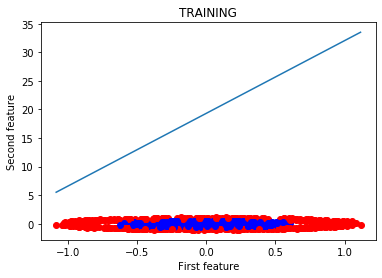

In [4]:
t.show_data("TRAINING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()

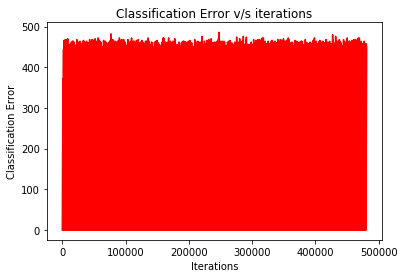

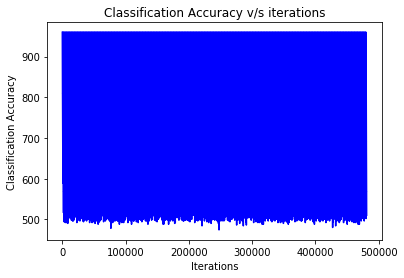

In [5]:
t.draw_error_count()

In [6]:
t.take_test_input()
t.test()

================================       TESTING        ==================================
Test Data size :  240
True positive : 120, False positive : 120
True negative : 0, False negative : 0
============================         TESTING FINISHED          =========================


=== Data points given to train : 960 ===


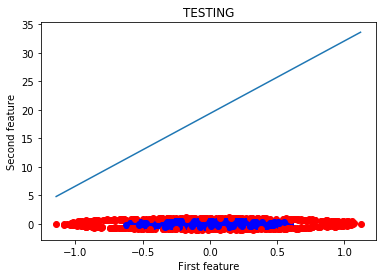

In [7]:
t.show_data("TESTING", "First feature", "Second feature")
t.draw_line_2d()
plt.show()

In [8]:
# Data is not linearly seperable. Hence perceptron fails.